In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
data =pd.read_csv('lending_club_loan_two.csv')

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data['emp_title'].fillna("Unknown", inplace=True)  # Filling text NaNs with 'Unknown'
data['emp_length'].fillna("0 years", inplace=True)
data[['revol_util', 'mort_acc', 'pub_rec_bankruptcies']] = imputer.fit_transform(data[['revol_util', 'mort_acc', 'pub_rec_bankruptcies']])

data['term'] = data['term'].apply(lambda x: int(x.strip().split()[0]))  # Extract the numeric part
label_enc_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']

for col in label_enc_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [37]:
scaler = StandardScaler()

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [39]:
lr_features = ['term', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']
X_lr = data[lr_features]
y_lr = data['loan_amnt']

In [40]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)
X_lr_train = scaler.fit_transform(X_lr_train)
X_lr_test = scaler.transform(X_lr_test)

In [41]:
lr = LinearRegression()
lr.fit(X_lr_train, y_lr_train)
lr_pred = lr.predict(X_lr_test)


In [42]:
lr_mse = mean_squared_error(y_lr_test, lr_pred)
lr_r2 = r2_score(y_lr_test, lr_pred)
print("Linear Regression - Loan Amount Prediction - MSE:", lr_mse, "R^2:", lr_r2)


Linear Regression - Loan Amount Prediction - MSE: 1186815.0219476232 R^2: 0.9829932895773036


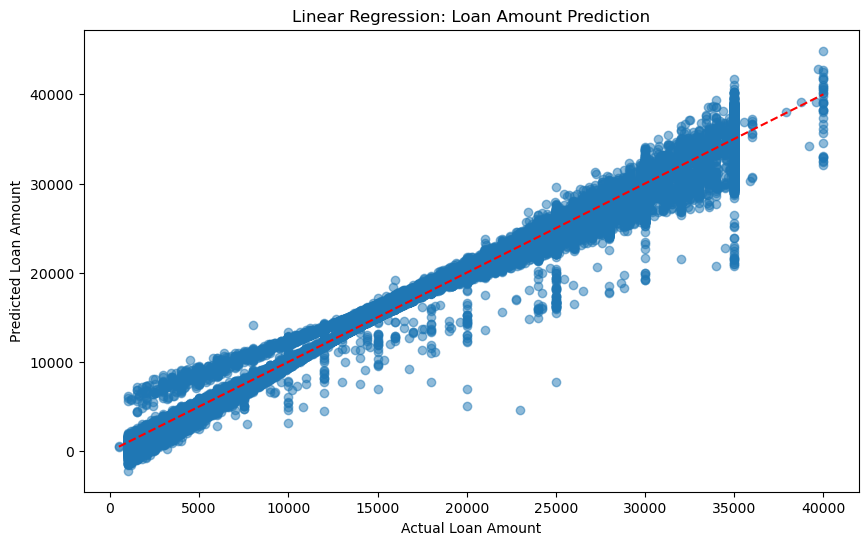

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_lr_test, lr_pred, alpha=0.5)
plt.plot([y_lr_test.min(), y_lr_test.max()], [y_lr_test.min(), y_lr_test.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Linear Regression: Loan Amount Prediction")
plt.show()